### Scraping datasets of Data Science Job Profiles

In [159]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from selenium import webdriver
import time

In [160]:
url = "https://www.naukri.com/data-science-jobs?k=data%20science"
r = requests.get(url)

# # converting to a bs obj
# soup = bs(r.content)

# # uncomment the code below to see the HTML content that we stored in soup
# contents = soup.prettify()
# print(contents) 


In [161]:
driver = webdriver.Chrome(".\\chromedriver.exe")
driver.get(url)
time.sleep(3)
soup = bs(driver.page_source, 'html5lib')
## uncomment line below to see the data
# print(soup.prettify())
driver.close()

In [162]:
df=pd.DataFrame(columns=['Title','Company','City','CTC','Exp','Rating','Reviews'])

In [163]:
results = soup.find(class_ = 'title fw500 ellipsis')
## uncomment line below to see the data
# print(results.prettify())

In [164]:
job_elems = soup.find_all('article', class_ = 'jobTuple bgWhite br4 mb-8')
## uncomment line below to see the data
# job_elems

In [165]:
for job_elem in job_elems:
    
    
    jTitle = job_elem.find('a', class_ = 'title fw500 ellipsis')
    jTitle = jTitle.text
    print(jTitle)
    
    
    jCompany = job_elem.find('a', class_ = 'subTitle ellipsis fleft')
    jCompany = jCompany.text
    print(jCompany)
    
    
    jCity = job_elem.find('li', class_ = 'fleft grey-text br2 placeHolderLi location')
    jCity = jCity.text
    jCity = jCity.split(" ")
    jCity = jCity[-1]
    jCity = jCity.split("/")
    jCity = jCity[-1]
    if jCity == "Areas)":
        jCity = "Remote"
    else:
        jCity = jCity
        
    print(jCity)    
    
    
    ########## code shifted below jExp block ##########
    
    jExp = job_elem.find('li', class_= 'fleft grey-text br2 placeHolderLi experience')
    jExp = jExp.text
    jExp = jExp.split("-")
    jExp = jExp[0]
    print(jExp)
    
    ##################### down here ##############
    
    jCtc = job_elem.find('li', class_= 'fleft grey-text br2 placeHolderLi salary')
    jCtc = jCtc.text
    
    if jCtc == "Not disclosed" and int(jExp) <= 2 :
        jCtc = "3,50,000 - 6,00,000 PA."
    elif jCtc == "Not disclosed" and int(jExp) <= 4 :
        jCtc = "6,50,000 - 9,00,000 PA."
    elif jCtc == "Not disclosed" and int(jExp) <= 6 :
        jCtc = "9,50,000 - 12,00,000 PA."
    elif jCtc == "Not disclosed" and int(jExp) <= 8 :
        jCtc = "12,50,000 - 20,00,000PA."
    elif jCtc == "Not disclosed" and int(jExp) <= 20 :
        jCtc = "20,50,000 - 25,00,000PA."    
    
    jCtc = jCtc.split("-")
    jCtc = jCtc[0]
    jCtc = jCtc.replace(",", "")
    jCtc = jCtc.replace(" ", "")
    
    print(jCtc)
    
    
    
    jRating = job_elem.find('span', class_= 'starRating fleft dot')
    if jRating is None:
        continue
    else:
        jRating = jRating.text
    print(jRating)
    
    jReviews = job_elem.find('a', class_= 'reviewsCount ml-5 fleft blue-text')
    if jReviews is None:
        continue
    else:
        jReviews = jReviews.text
    
    jReviews = jReviews.split(" ")
    jReviews = jReviews[0]
    jReviews = jReviews.replace("(", "")
    
    print(jReviews)
    
    
    print(" "*2)
    
    df = df.append({'Title': jTitle, 'Company':jCompany, 'City':jCity, 'CTC':jCtc, 'Exp':jExp, 'Rating':jRating, 'Reviews':jReviews}, ignore_index=True)
    

    

    

data science analyst
CRED
Bengaluru
1
350000
BUSINESS ANALYST -DATA SCIENCE-CONSUMER
BRIDGEi2i Analytics Solutions Private Limited
Bengaluru
1
350000
3.6
41
  
Data Science Analyst
JPMorgan Services India Pvt. Ltd
Bengaluru
4
650000
4.1
2017
  
Data Science Analyst 2
Epsilon
Bengaluru
2
350000
3.8
188
  
Data Science Content Developer
Data is Good
Remote
0
175000
Artificial intelligence  and Data science Developer For Virtusa
Virtusa Consulting Services Pvt Ltd
Secunderabad
4
500000
3.4
1032
  
Data Science- Associate Data Scientist
Jet2 Travel Technologies Pvt. Ltd.
Pune
0
350000
Data Science Intern (remote)
Amploy.io
Remote
0
1300000
Data Science
Capgemini Technology Services India Limited
Mumbai
6
950000
3.6
12372
  
Data Science Analyst
MJB Technology Solutions
Pune
3
650000
Urgently hiring For Data science Analysts - Pune - 4+ Yrs
FIS Global Business Solutions India Pvt. Ltd.
Remote
4
500000
4.0
1831
  
Opening For Data Data Science Analyst  & Data Analyst
Motilal Oswal Financial 

In [166]:
df.columns

Index(['Title', 'Company', 'City', 'CTC', 'Exp', 'Rating', 'Reviews'], dtype='object')

In [167]:
df.head(14)

,Title,Company,City,CTC,Exp,Rating,Reviews
0,BUSINESS ANALYST -DATA SCIENCE-CONSUMER,BRIDGEi2i Analytics Solutions Private Limited,Bengaluru,350000,1,3.6,41
1,Data Science Analyst,JPMorgan Services India Pvt. Ltd,Bengaluru,650000,4,4.1,2017
2,Data Science Analyst 2,Epsilon,Bengaluru,350000,2,3.8,188
3,Artificial intelligence and Data science Deve...,Virtusa Consulting Services Pvt Ltd,Secunderabad,500000,4,3.4,1032
4,Data Science,Capgemini Technology Services India Limited,Mumbai,950000,6,3.6,12372
5,Urgently hiring For Data science Analysts - Pu...,FIS Global Business Solutions India Pvt. Ltd.,Remote,500000,4,4.0,1831
6,Opening For Data Data Science Analyst & Data ...,Motilal Oswal Financial Services,Remote,800000,5,3.5,556
7,Data Science & Analysis (Technology Management),\tMorgan Stanley Advantage Services,Mumbai,650000,3,3.6,263
8,Senior Analyst-Data Science,Accenture Solutions Pvt Ltd,Bengaluru,950000,5,4.0,18231
9,Senior Analyst-Data Science,Accenture Solutions Pvt Ltd,Bengaluru,950000,5,4.0,18231


###### Uncomment the line below and run the cell to make a csv file ( data.csv ) and write the data-frame above

In [169]:
pltCtc = df['CTC'].tolist()
pltRating = df['Rating'].tolist()
pltExp = df['Exp'].tolist()
pltReviews = df['Reviews'].tolist()

In [87]:
# df.to_csv('data.csv', encoding='utf-8', index_label='Sr. No')

<function matplotlib.pyplot.show(close=None, block=None)>

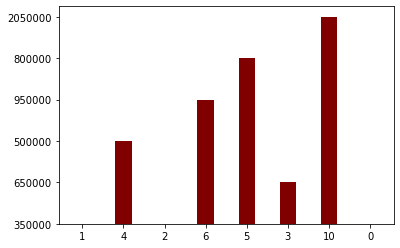

In [173]:
from matplotlib import pyplot as plt

plt.bar(pltExp, pltCtc, color='maroon', width = 0.4)
plt.show
